Brandon Ronaldo Sicay Cumes

Daniel Esteban Morales Urizar 

Laboratorio 1: Análisis Exploratorio, PCA y Apriori - Cervical Cancer Risks Factors

Repositorio: https://github.com/bsicay/Lab1_DS

# Descripción del conjunto de datos
El conjunto de datos se recopiló del Hospital Universitario de Caracas en Caracas, Venezuela. El conjunto de datos comprende información demográfica, hábitos y registros médicos históricos de 858 pacientes. Varios pacientes decidieron no responder algunas de las preguntas debido a problemas de privacidad (valores faltantes).

In [6]:
## improtando librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import pandas_profiling
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer
from scipy import stats as st
%matplotlib inline

## 1. Análisis Exploratorio

Objetivo: predecir la probabilidad de que una mujer adquiera el cáncer.



In [68]:
## importando conjunto de datos
data = pd.read_csv("risk_factors_cervical_cancer.csv")
print("\n************ Vista al conjunto de datos *************")
print("El conjunto de datos contiene %i observaciones & %i columnas. " %data.shape)


************ Vista al conjunto de datos *************
El conjunto de datos contiene 858 observaciones & 36 columnas. 


In [69]:
data.head()


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0


In [70]:
## Mostraremos diferentes descriptores estadísticos del conjunto de datos que acabamos:

pd.set_option('display.max_columns', None)
data.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,832.000000,851.000000,802.000000,845.000000,845.000000,845.000000,750.000000,750.000000,741.000000,741.000000,753.000000,753.000000,753.000000,753.0,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.0,753.000000,753.000000,753.000000,858.000000,71.000000,71.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.527644,16.995300,2.275561,0.145562,1.219721,0.453144,0.641333,2.256419,0.112011,0.514804,0.104914,0.176627,0.058433,0.0,0.005312,0.057105,0.023904,0.001328,0.001328,0.001328,0.0,0.023904,0.001328,0.002656,0.087413,6.140845,5.816901,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,1.667760,2.803355,1.447414,0.352876,4.089017,2.226610,0.479929,3.764254,0.315593,1.943089,0.306646,0.561993,0.234716,0.0,0.072739,0.232197,0.152853,0.036442,0.036442,0.036442,0.0,0.152853,0.036442,0.051503,0.302545,5.895024,5.755271,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,8.000000,7.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,19.000000,1.000000,4.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,3.000000,22.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [72]:
(data.dtypes)


Age                                     int64
Number of sexual partners             float64
First sexual intercourse              float64
Num of pregnancies                    float64
Smokes                                float64
Smokes (years)                        float64
Smokes (packs/year)                   float64
Hormonal Contraceptives               float64
Hormonal Contraceptives (years)       float64
IUD                                   float64
IUD (years)                           float64
STDs                                  float64
STDs (number)                         float64
STDs:condylomatosis                   float64
STDs:cervical condylomatosis          float64
STDs:vaginal condylomatosis           float64
STDs:vulvo-perineal condylomatosis    float64
STDs:syphilis                         float64
STDs:pelvic inflammatory disease      float64
STDs:genital herpes                   float64
STDs:molluscum contagiosum            float64
STDs:AIDS                         

## 2. Tipo de Variable

### Profiling


In [23]:
pandas_profiling.ProfileReport(data)


Render HTML: 100%|██████████| 1/1 [00:00<00:00,  2.77it/s]


## 3. Gráficos Exploratorios

### Histograma
Los histogramas nos ayudan a representar datos proporcionados en forma de algunos grupos. Por lo tanto, para representar la población según la edad en forma de gráfico, entonces el histograma se adapta bien, ya que le indica cuántos existen en cierto rango de grupo o bin, si habla en contexto de histogramas.



array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Number of sexual partners'}>,
        <Axes: title={'center': 'First sexual intercourse'}>,
        <Axes: title={'center': 'Num of pregnancies'}>,
        <Axes: title={'center': 'Smokes'}>,
        <Axes: title={'center': 'Smokes (years)'}>],
       [<Axes: title={'center': 'Smokes (packs/year)'}>,
        <Axes: title={'center': 'Hormonal Contraceptives'}>,
        <Axes: title={'center': 'Hormonal Contraceptives (years)'}>,
        <Axes: title={'center': 'IUD'}>,
        <Axes: title={'center': 'IUD (years)'}>,
        <Axes: title={'center': 'STDs'}>],
       [<Axes: title={'center': 'STDs (number)'}>,
        <Axes: title={'center': 'STDs:condylomatosis'}>,
        <Axes: title={'center': 'STDs:cervical condylomatosis'}>,
        <Axes: title={'center': 'STDs:vaginal condylomatosis'}>,
        <Axes: title={'center': 'STDs:vulvo-perineal condylomatosis'}>,
        <Axes: title={'center': 'STDs:syphilis'}>]

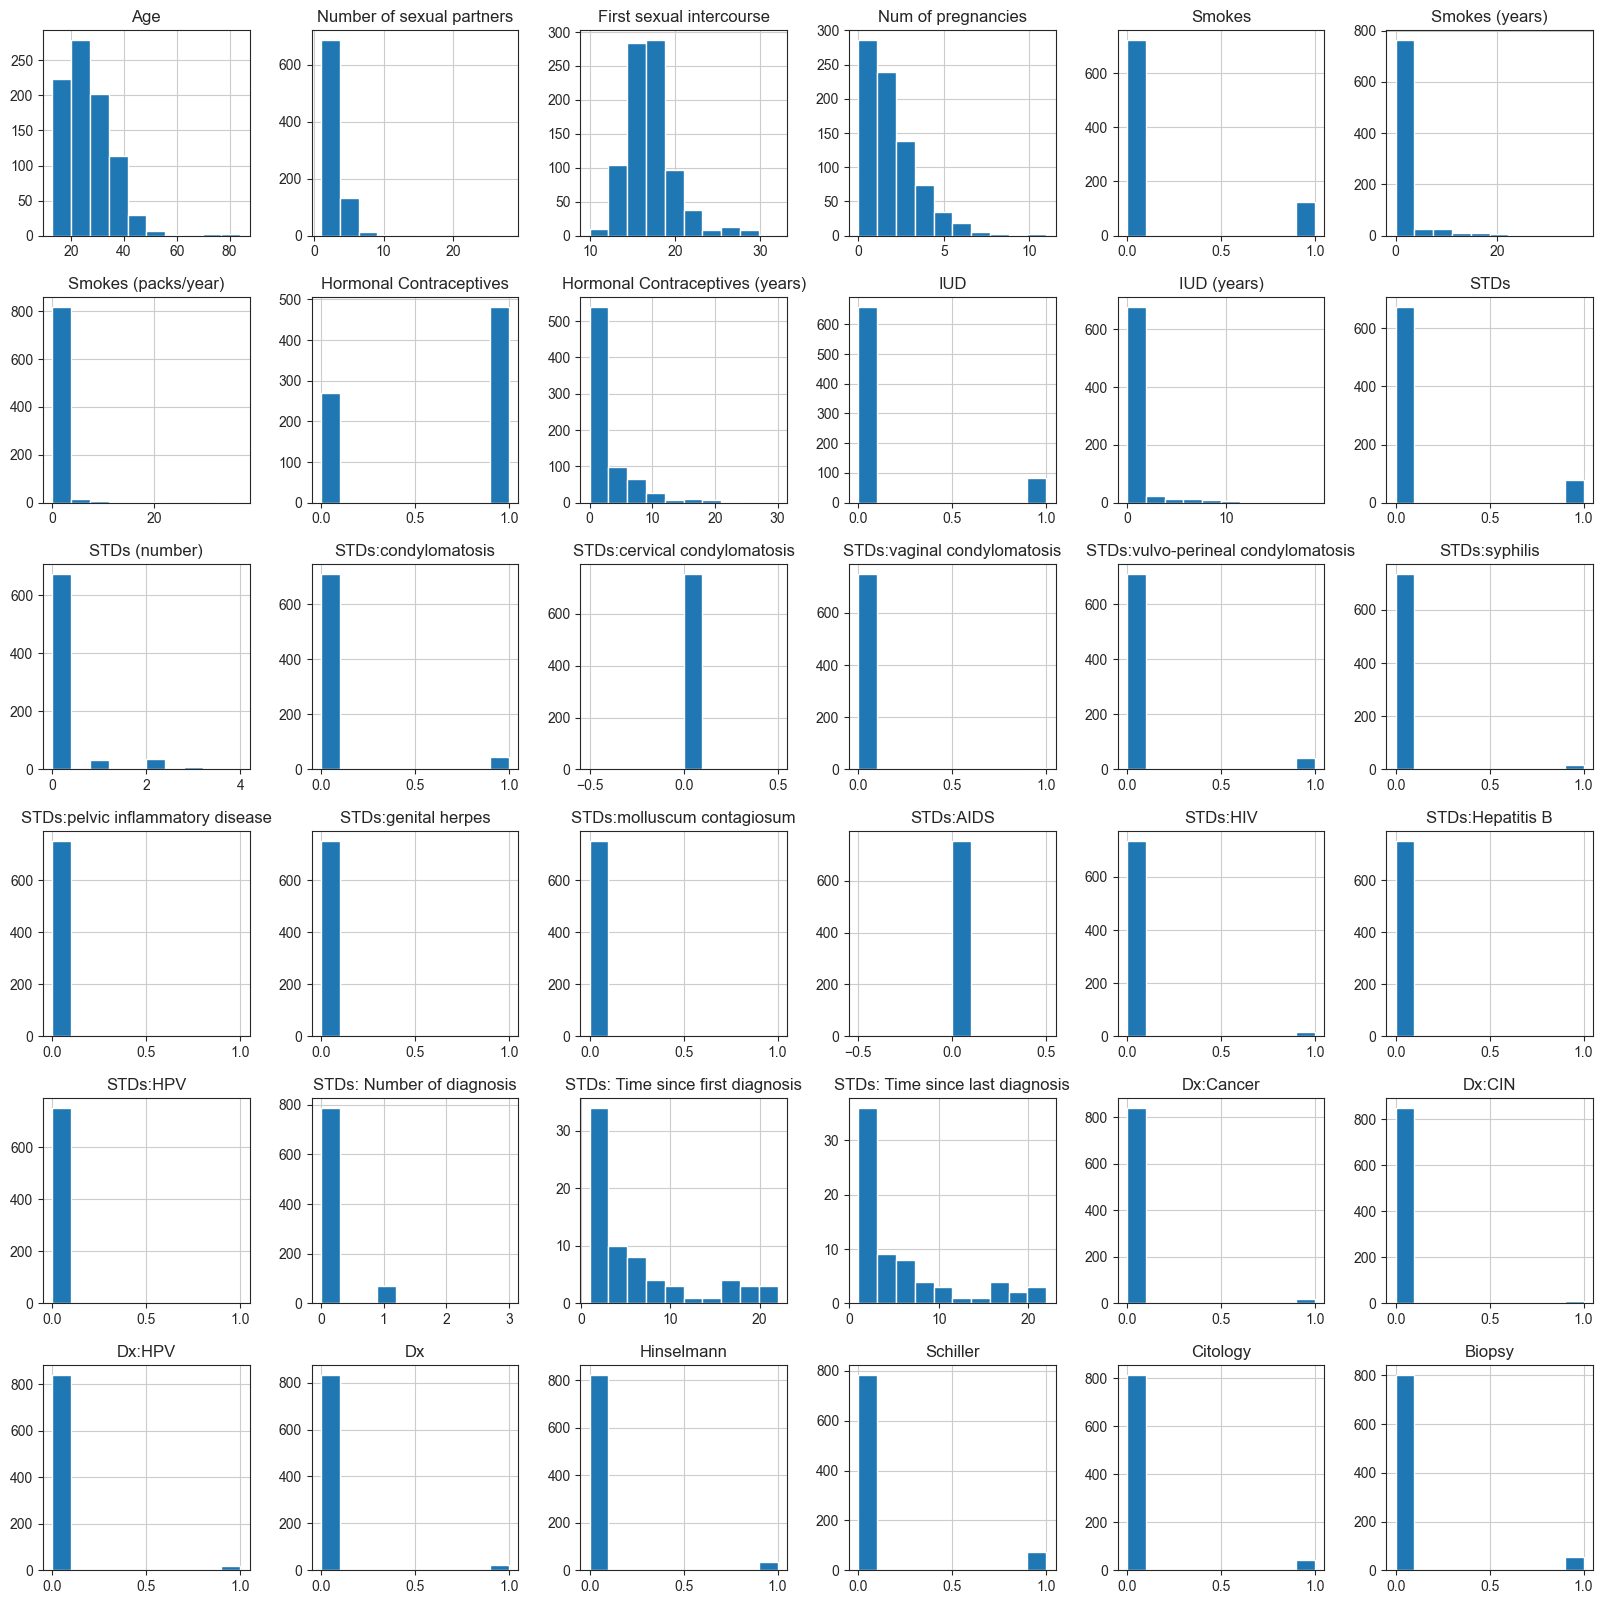

In [36]:
data.hist(figsize=(20,20))


### Variables objetivo


/var/folders/cy/x57dh4ds2g123w7nj93wcf_c0000gn/T/ipykernel_33033/4269601854.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Biopsy', data=data, palette='GnBu');


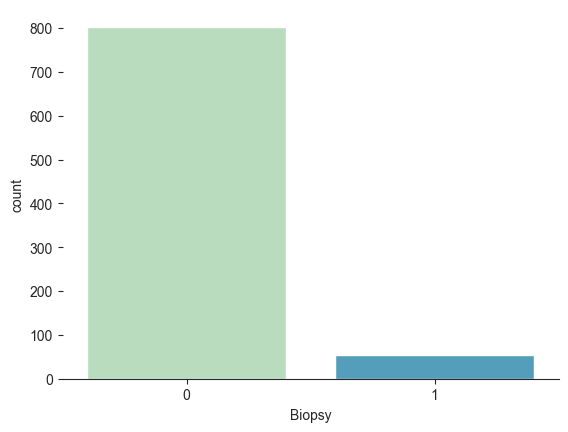

In [37]:
sns.set_style("ticks")
sns.countplot(x='Biopsy', data=data, palette='GnBu');
sns.despine(left=True)

/var/folders/cy/x57dh4ds2g123w7nj93wcf_c0000gn/T/ipykernel_33033/4285079526.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Citology', data=data, palette='Reds');


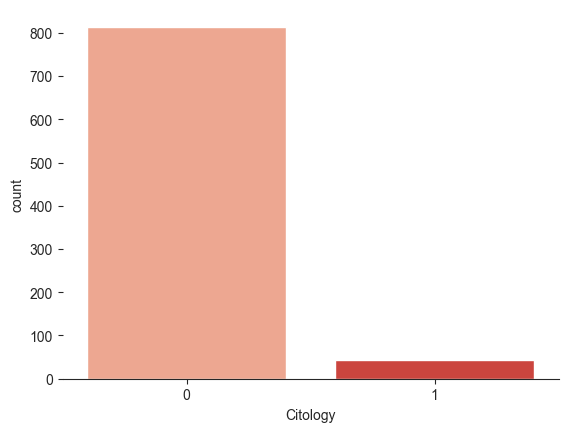

In [38]:
sns.set_style("ticks")
sns.countplot(x='Citology', data=data, palette='Reds');
sns.despine(left=True)


/var/folders/cy/x57dh4ds2g123w7nj93wcf_c0000gn/T/ipykernel_33033/2723551146.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hinselmann', data=data, palette='Greens');


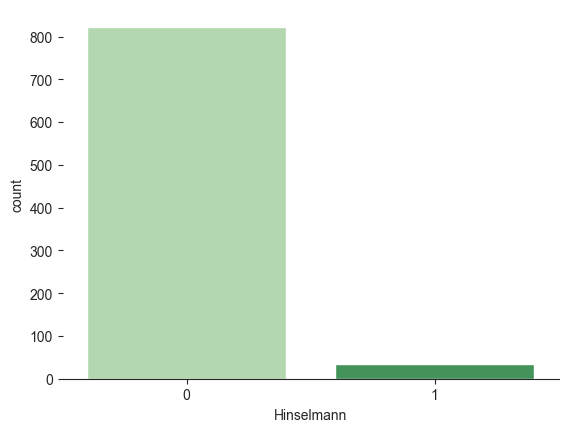

In [39]:
sns.set_style("ticks")
sns.countplot(x='Hinselmann', data=data, palette='Greens');
sns.despine(left=True)


/var/folders/cy/x57dh4ds2g123w7nj93wcf_c0000gn/T/ipykernel_33033/652000644.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Schiller', data=data, palette='Blues');


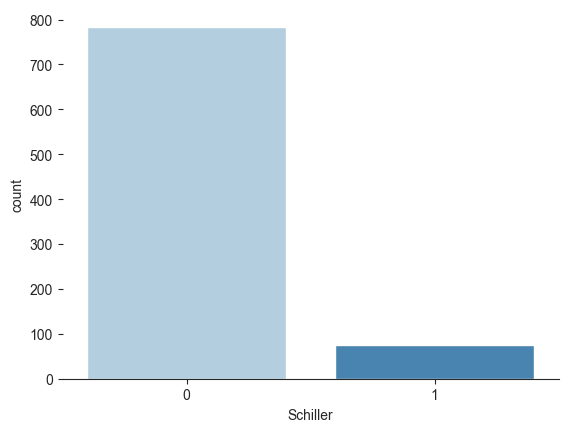

In [40]:
sns.set_style("ticks")
sns.countplot(x='Schiller', data=data, palette='Blues');
sns.despine(left=True)


<Axes: >

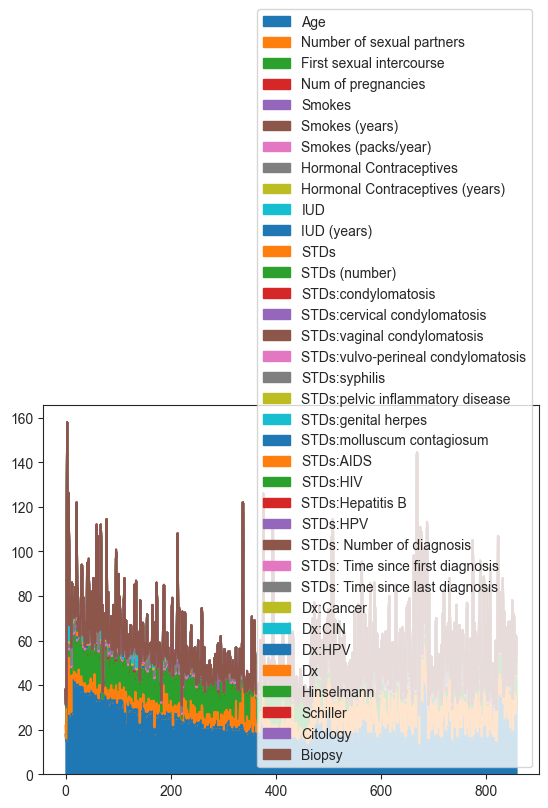

In [41]:
data.plot.area()


El gráfico del área muestra cada atributo en una curva diferente y luego apila todas las curvas una encima de la otra. Es interesante ver que las dos características dominantes son: Edad y Biopsia. Como resultado de lo anterior, se gráfico un histograma, en este se muestra la relación entre Edad y Biopsia, de la cual existe una fuerte correlación.

<Axes: ylabel='Frequency'>

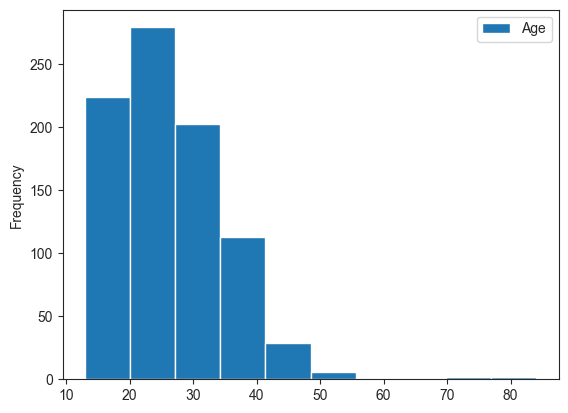

In [42]:
data.plot.hist(x="Biopsy", y="Age")


De esto ultimo sabemos que de las mujeres incluidas en el conjunto de datos, la mayoría de los casos de cáncer cervical que resultó en una biopsia ocurrieron cuando las mujeres tenían entre 20 y 30 años. En conclusión, podemos asegurar con certeza que las biopsias a menudo se realizan en mujeres que todavía quieren tener hijos, ya que la mayoría de las mujeres que aún desean tener hijos tendrían entre 20 y 30 años.

## 6. Preprocesamiento - Valores faltantes

## Visualización de valores perdidos 

Text(0.5, 1.0, 'Valores perdidos')

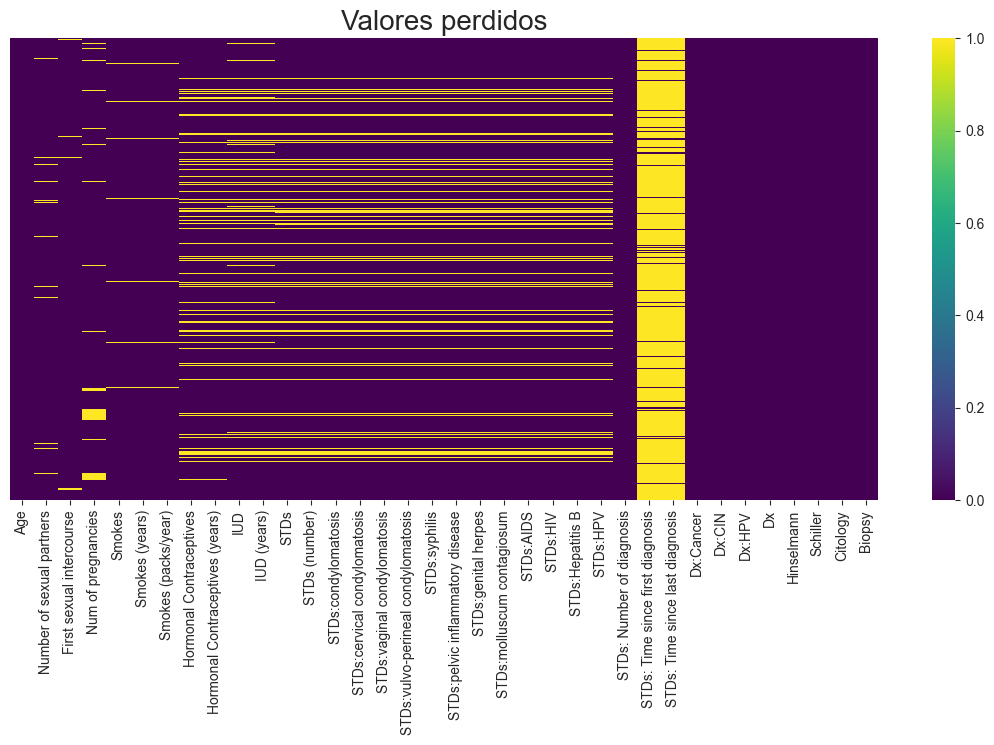

In [73]:
plt.figure(figsize=(14, 6))
p = sns.heatmap(data.isnull(), yticklabels=False, cbar=True, cmap='viridis')
p.axes.set_title("Valores perdidos", fontsize=20)

### ¿Es factible eliminar todos los valores faltantes de todas las variables?
Dado que no hay suficientes datos en las características $\textit{STD: Time since first diagnosis}$ y $\textit{STD:
Time since last diagnosis}$, estas características se eliminan del conjunto de datos.


In [74]:
data.drop(['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis'], axis=1, inplace=True)

Verificamos la forma de los datos, despues de haber eliminado estás dos características

In [75]:
data.shape

(858, 34)

Volvemos a verificar mediante el mapa de calor, si las caracteristicas fueron eliminadas correctamente del conjunto de datos. 

Text(0.5, 1.0, 'Valores perdidos despues de filtrar')

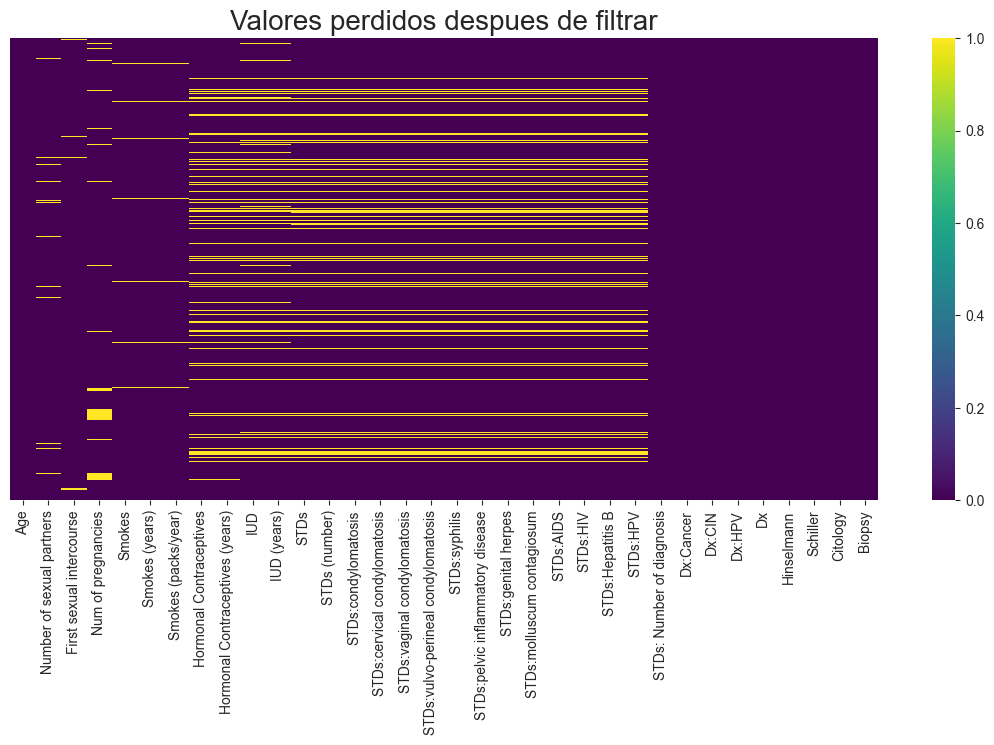

In [76]:
plt.figure(figsize=(14, 6))
p = sns.heatmap(data.isnull(), yticklabels=False, cbar=True, cmap='viridis')
p.axes.set_title("Valores perdidos despues de filtrar",fontsize=20)

In [78]:
(data.dtypes)


Age                                     int64
Number of sexual partners             float64
First sexual intercourse              float64
Num of pregnancies                    float64
Smokes                                float64
Smokes (years)                        float64
Smokes (packs/year)                   float64
Hormonal Contraceptives               float64
Hormonal Contraceptives (years)       float64
IUD                                   float64
IUD (years)                           float64
STDs                                  float64
STDs (number)                         float64
STDs:condylomatosis                   float64
STDs:cervical condylomatosis          float64
STDs:vaginal condylomatosis           float64
STDs:vulvo-perineal condylomatosis    float64
STDs:syphilis                         float64
STDs:pelvic inflammatory disease      float64
STDs:genital herpes                   float64
STDs:molluscum contagiosum            float64
STDs:AIDS                         

## 4, 5. Análisis de Correlación - Variables numéricas y categóricas

In [49]:
data.corr()["Biopsy"].sort_values(ascending=False)


Biopsy                                1.000000
Schiller                              0.733204
Hinselmann                            0.547417
Citology                              0.327466
Dx:Cancer                             0.160905
Dx:HPV                                0.160905
Dx                                    0.157607
STDs:genital herpes                   0.130523
Dx:CIN                                0.113172
STDs:HIV                              0.112519
STDs: Number of diagnosis             0.097449
STDs                                  0.096758
STDs (number)                         0.085246
Hormonal Contraceptives (years)       0.084253
STDs:vulvo-perineal condylomatosis    0.077082
STDs:condylomatosis                   0.075080
Smokes (years)                        0.059949
Age                                   0.055956
IUD                                   0.045314
Smokes                                0.039296
Num of pregnancies                    0.036625
Smokes (packs

In [51]:
def display_corr_with_col(df,col):
    corr_matrix = df.corr()
    corr_type = corr_matrix[col].copy()
    abs_corr_type = corr_type.apply(lambda x:abs(x))
    desc_corr_values = abs_corr_type.sort_values(ascending=False)
    y_values = list(desc_corr_values.values)[1:]
    x_values = range(0,len(y_values))
    xlabels = list(desc_corr_values.keys())[1:]
    fig,ax = plt.subplots(figsize=(8,8))
    ax.bar(x_values,y_values)
    ax.set_title('Correlación de todas las características con {}'.format(col),fontsize=20)
    ax.set_ylabel('Pearson correlatie coefficient [abs waarde]', fontsize=16)
    plt.xticks(x_values,xlabels,rotation='vertical')
    plt.show()

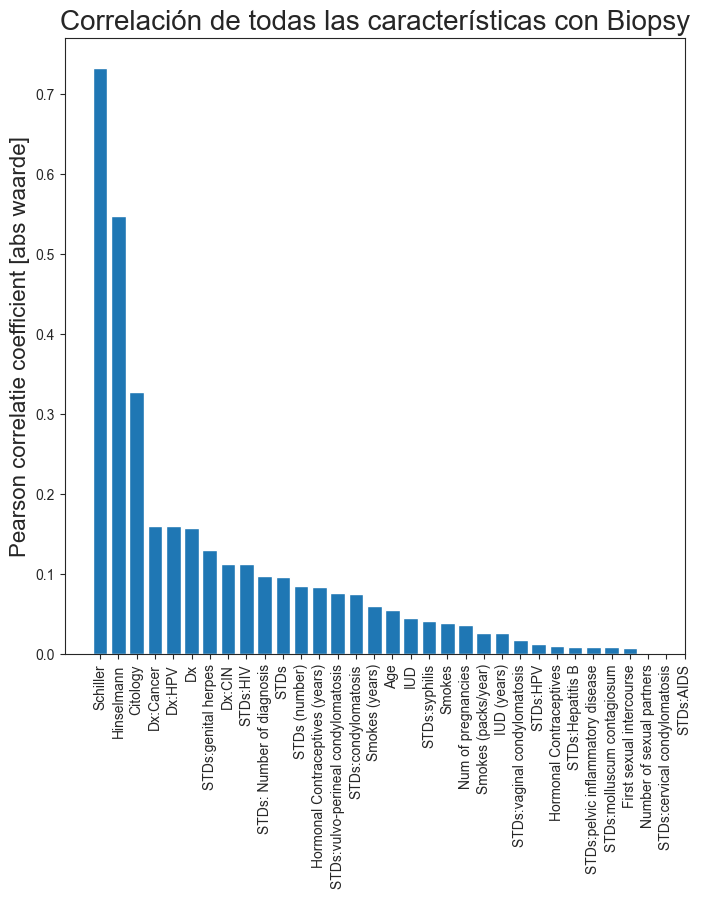

In [52]:
display_corr_with_col(data,'Biopsy')


Las características de *Schiller, Hinselmann, Citología y STD´s* pueden ser las principales caracteristicas para los predictores de este conjunto de datos debido a su alta correlación con la variable objetivo **Biopsia**.

Mientras tanto, las características con correlación de NaN con Biopsia son las columnas con un solo valor distinto, como se muestra a continuación.

### Lista de columnas con solo 1 valor distinto

In [53]:
print([col for col in data.columns if data[col].value_counts().shape[0] == 1])

['STDs:cervical condylomatosis', 'STDs:AIDS']


Separaremos las $\textit{features}$ de la clase. En el conjunto de datos la Biopsia representa si se le hizo biopsia o no a la paciente. 

In [54]:
X = data.drop('Biopsy', axis = 1)
y = data['Biopsy']
print(X.shape)
print(y.shape)

(858, 33)
(858,)


Ranking de atributos:
1. Atributo 31 Schiller (0.344210)
2. Atributo 30 Hinselmann (0.130459)
3. Atributo 0 Age (0.074435)
4. Atributo 2 First sexual intercourse (0.067912)
5. Atributo 8 Hormonal Contraceptives (years) (0.055449)
6. Atributo 1 Number of sexual partners (0.054187)
7. Atributo 32 Citology (0.052432)
8. Atributo 3 Num of pregnancies (0.050461)
9. Atributo 7 Hormonal Contraceptives (0.017214)
10. Atributo 5 Smokes (years) (0.016869)
11. Atributo 10 IUD (years) (0.015934)
12. Atributo 6 Smokes (packs/year) (0.015729)
13. Atributo 19 STDs:genital herpes (0.014970)
14. Atributo 9 IUD (0.010346)
15. Atributo 29 Dx (0.009471)
16. Atributo 27 Dx:CIN (0.009281)
17. Atributo 4 Smokes (0.009139)
18. Atributo 26 Dx:Cancer (0.008390)
19. Atributo 28 Dx:HPV (0.008339)
20. Atributo 12 STDs (number) (0.006339)
21. Atributo 25 STDs: Number of diagnosis (0.006252)
22. Atributo 22 STDs:HIV (0.005842)
23. Atributo 11 STDs (0.005077)
24. Atributo 17 STDs:syphilis (0.004924)
25. Atributo 13 S

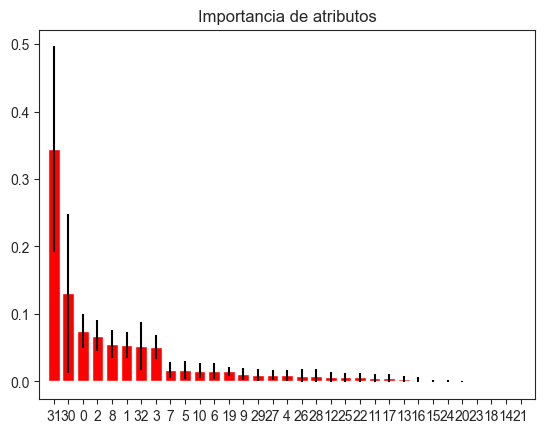

In [55]:
from sklearn.ensemble import ExtraTreesClassifier

# Construir un bosque y calcular las características importantes
forest = ExtraTreesClassifier(n_estimators=250, random_state=0)

forest.fit(X,y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Mostramos el ranking de las características
print("Ranking de atributos:")

for f in range(X.shape[1]):
    print("%d. Atributo %d %s (%f)" % (f + 1, indices[f], X.columns[indices[f]], importances[indices[f]]))
# Mostramos la importancia de las características dentro del bosque creado
plt.figure()
plt.title("Importancia de atributos")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

## 7. Estudie si es posible hacer transformaciones en las variables categóricas para incluirlas en el PCA, ¿valdrá la pena?

Es posible hacer transformaciones en las variables categóricas para incluirlas en el análisis PCA. En este caso, es especialmente útil ya que existen variables categóricas como smoke, en donde estas variables deben de ser aplicadas a transformaciones. 


In [79]:
####completando los NaN values con dummy values para variables categoricas.

data = pd.get_dummies(data=data, columns=['Smokes','Hormonal Contraceptives','IUD','STDs',
                                      'Dx:Cancer','Dx:CIN','Dx:HPV','Dx','Hinselmann','Citology','Schiller'])

Para los demás valores faltantes del tipo $\textit{NaN}$, utilizaremos la función $Fillna$ de pandas, utilizando el siguiente método:

In [81]:
data.fillna(method='pad', inplace=True)

/var/folders/cy/x57dh4ds2g123w7nj93wcf_c0000gn/T/ipykernel_33033/889707181.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='pad', inplace=True)


Verificaremos que no tenemos valores pérdidos o nulos en el dataset

In [82]:
data.isnull().values.any()

np.False_

Para los valores faltantes del tipo $\textit{NaN}$, utilizaremos la función $Fillna$ de pandas, utilizando el siguiente método:

In [62]:
data.describe()


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.0,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.0,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.518648,16.989510,2.320513,1.251357,0.451072,2.149387,0.515117,0.178322,0.059441,0.0,0.004662,0.058275,0.024476,0.001166,0.001166,0.001166,0.0,0.024476,0.001166,0.002331,0.087413,0.064103
std,8.497948,1.654597,2.798755,1.478298,4.164964,2.211347,3.632135,1.924753,0.569260,0.236585,0.0,0.068159,0.234399,0.154610,0.034139,0.034139,0.034139,0.0,0.154610,0.034139,0.048252,0.302545,0.245078
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,37.000000,37.000000,30.000000,19.000000,4.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,3.000000,1.000000
